### Logistic Regression for Titanic Training Data set
#### Here we are going to predict wheather the person has servied or not?

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings("ignore")
pd.options.display.max_columns = None

In [18]:
df = pd.read_csv('titanic-training-data.csv')

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [21]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [23]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5,A26,C


In [24]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


In [25]:
df.shape             # displays the shape of the data (row,column)

(891, 12)

In [26]:
df.describe()  # statistical data includes count, mean, std, min, 25%, 50%, 75%, max

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df.describe(include="all") # this includes all the description of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
df.info()          # displays the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.isnull().sum()   # sum of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### For cabin column we have a lot of missing data and it is catagorical data which is not possible to replace so we will drop it.

In [30]:
df.dtypes    # data types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Analyse the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

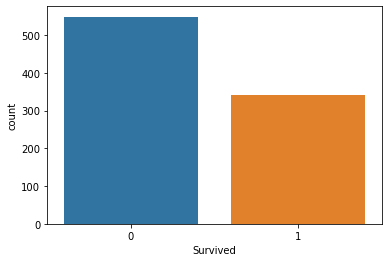

In [31]:
sns.countplot(x="Survived",data=df)   # countplot is used for counting 

<AxesSubplot:xlabel='Survived', ylabel='count'>

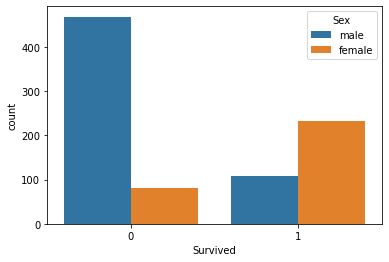

In [32]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

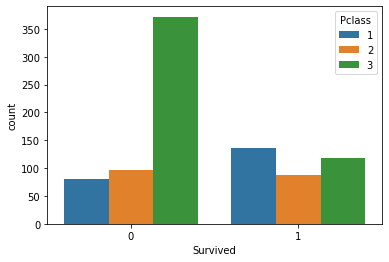

In [33]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

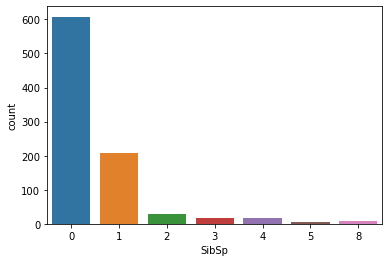

In [34]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

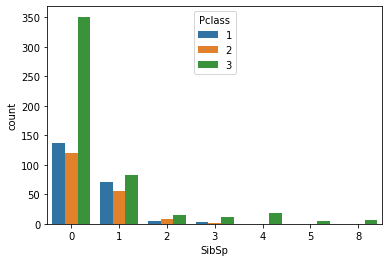

In [41]:
sns.countplot(x="SibSp",hue="Pclass",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

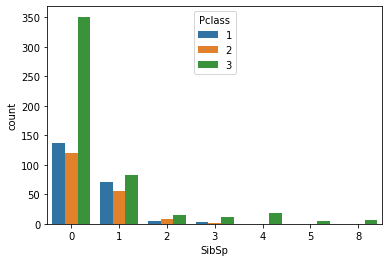

In [42]:
sns.countplot(x="SibSp",hue="Pclass",data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

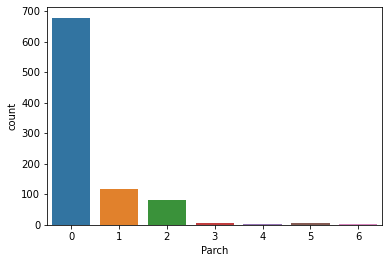

In [44]:
sns.countplot(x="Parch",data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

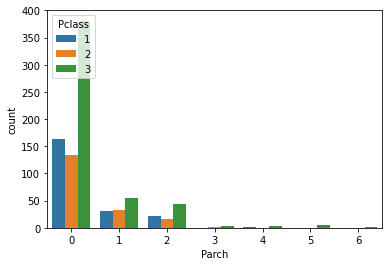

In [38]:
sns.countplot(x="Parch",hue="Pclass",data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

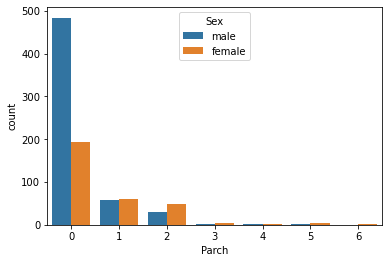

In [39]:
sns.countplot(x="Parch",hue="Sex",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

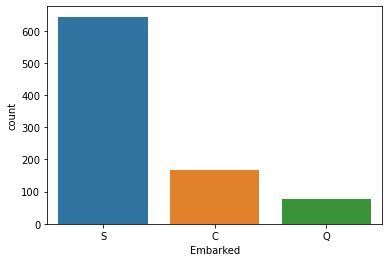

In [45]:
sns.countplot(x="Embarked",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

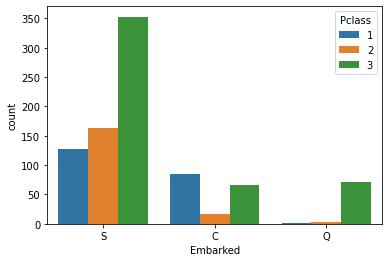

In [37]:
sns.countplot(x="Embarked",hue="Pclass",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

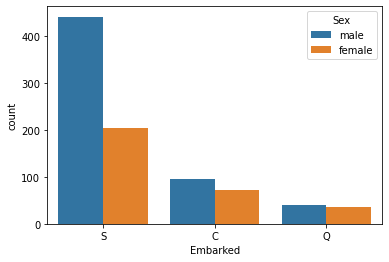

In [40]:
sns.countplot(x="Embarked",hue="Sex",data=df)

### Data Wrangling

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

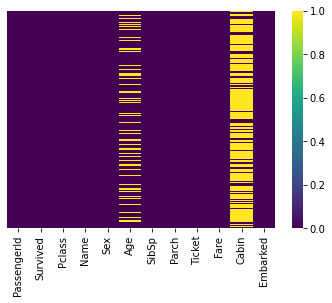

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")  # Finding Missing value with Visualization

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

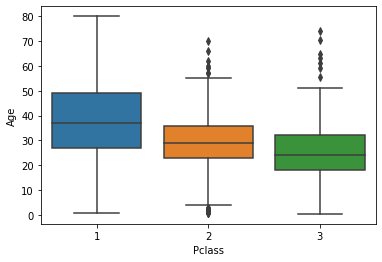

In [23]:
sns.boxplot(x="Pclass",y="Age",data=df)   # One should be numerical data

<AxesSubplot:xlabel='Sex', ylabel='Age'>

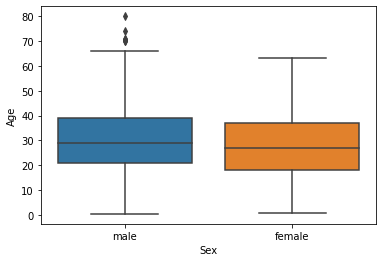

In [47]:
sns.boxplot(x="Sex",y="Age",data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

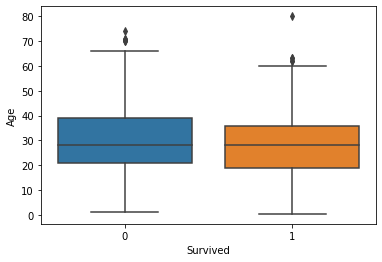

In [48]:
sns.boxplot(x="Survived",y="Age",data=df)

In [49]:
df.drop("Cabin",axis=1,inplace=True)   # dropping cabin because it contains lot of missing value

In [25]:
df.dropna(inplace=True)

<AxesSubplot:>

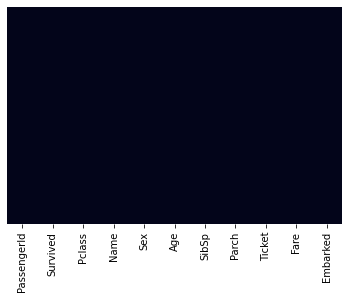

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [28]:
df.head()  # Checking

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
Sex=pd.get_dummies(df["Sex"])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [30]:
Sex=pd.get_dummies(df["Sex"],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [31]:
embark=pd.get_dummies(df["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
pcl=pd.get_dummies(df["Pclass"],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [34]:
df=pd.concat([df,Sex,embark,pcl],axis=1)  # delete name, ticket, fare, passengerid, pclass, sex, Embarked
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [35]:
df.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass","Fare"],axis=1,inplace=True)
df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


### Spliting of the Data

In [37]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

### Fiting the Model

In [48]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [41]:
predictions=model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score  # displays the accuracy score
accuracy_score(y_test,predictions)

0.794392523364486

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       122
           1       0.80      0.70      0.74        92

    accuracy                           0.79       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.79      0.79      0.79       214



In [44]:
from sklearn.metrics import confusion_matrix  # alternate of above metrics
confusion_matrix(y_test,predictions)

array([[106,  16],
       [ 28,  64]], dtype=int64)

<AxesSubplot:>

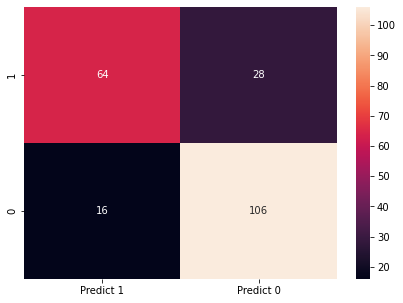

In [45]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

### The confusion matrix

* True Positives (TP): we correctly predicted that they do have diabetes 64

* True Negatives (TN): we correctly predicted that they don't have diabetes 106

* False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 16 Falsely predict positive Type I error

* False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 28 Falsely predict negative Type II error

### how good the model is?
#### It depends upon the client. the accuracy can be improved according to the client (weather he wants to reduce FP or FN)

In [2]:
True_Positive = 64
True_Negative = 106
False_Positive = 16
False_Negative = 28

In [3]:
Accuracy = (True_Positive+True_Negative)/(True_Positive+True_Negative+False_Positive+False_Negative)
Accuracy

0.794392523364486

In [4]:
Actual_Positive = False_Negative+True_Positive
Actual_Positive

92

In [5]:
Recall = (True_Positive)/(Actual_Positive)   # also known as Sensitivity or True Positive Rate
Recall

0.6956521739130435

In [6]:
Predicted_Positive = True_Positive + False_Positive
Predicted_Positive

80

In [7]:
Precission = (True_Positive)/(Predicted_Positive)
Precission

0.8

In [8]:
Actual_Negative = False_Positive +True_Negative
Actual_Negative

122

In [9]:
True_Negative_Rate = True_Negative/Actual_Negative   # Also known as Specificity
True_Negative_Rate

0.8688524590163934

In [10]:
False_Positive_Rate = False_Positive/Actual_Negative
False_Positive_Rate

0.13114754098360656

In [14]:
if True_Negative_Rate+False_Positive_Rate==1:
    print (True)
else:
    print(False)

True
